# Stock Market Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_theme(style = 'darkgrid')

## Loading Data

In [2]:
def load_data(dataset):
    path = 'C:/pandas/'
    return pd.read_csv(path + f'{dataset}.csv')

In [3]:
tesla = load_data('Tesla_Stock')
gm = load_data('GM_Stock')
ford = load_data('Ford_Stock')

## Check the Data Quality

In [4]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [6]:
def if_null(dataset):
    return dataset.isnull().sum()

In [7]:
def if_duplicated(dataset):
    return dataset.duplicated().sum()

In [8]:
if_null(tesla)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
if_duplicated(tesla)

0

In [10]:
gm.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,20.83,21.18,20.75,21.05,9321420
1,2012-01-04,21.05,21.37,20.75,21.15,7856752
2,2012-01-05,21.10,22.29,20.96,22.17,17884040
3,2012-01-06,22.26,23.03,22.24,22.92,18234608
4,2012-01-09,23.20,23.43,22.70,22.84,12091714


In [11]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [12]:
if_null(gm)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [13]:
if_duplicated(gm)

0

In [14]:
ford.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,11.00,11.25,10.99,11.13,45709811
1,2012-01-04,11.15,11.53,11.07,11.30,79725188
2,2012-01-05,11.33,11.63,11.24,11.59,67877467
3,2012-01-06,11.74,11.80,11.52,11.71,59840605
4,2012-01-09,11.83,11.95,11.70,11.80,53981467


In [15]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1257 non-null   float64
 2   High    1257 non-null   float64
 3   Low     1257 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [16]:
if_null(ford)

Date      0
Open      1
High      1
Low       1
Close     0
Volume    0
dtype: int64

In [17]:
if_duplicated(ford)

0

## Cleaning Data

In [18]:
ford = ford.dropna()

```
Missing values in the Open, High, and Low columns impact our analysis. As only one row is missing, we can remove it.
```

In [19]:
# Define a function to add a new column representing the year and month
def convert_datetime(datasets, column):
    for dataset in datasets:
        dataset[column] = pd.to_datetime(dataset[column])

```
The Date column in the three datasets is not in the correct data type for time series analysis and needs to be converted to the datetime format.
```

In [20]:
# Convert the 'Date' column in all datasets to datetime format for time series analysis
datasets = [tesla, 
            gm, 
            ford]

convert_datetime(datasets, 'Date')

In [21]:
# Define a function to add a new column representing the year and month
def create_year_month_col(datasets, col, newcol):
    for dataset in datasets:
        dataset[newcol] = dataset[col].dt.to_period('M')

In [22]:
create_year_month_col(datasets, 'Date', 'yearmonth')

## Visualizing the Data

In [23]:
# Define a function to plot line charts for multiple datasets
def multi_dataset_lineplot(datalist, x_col, y_col, figsize):
    plt.figure(figsize = figsize)
    for dataset, label in datalist:
        sns.lineplot(data = dataset, x = x_col, y = y_col, label = label)  

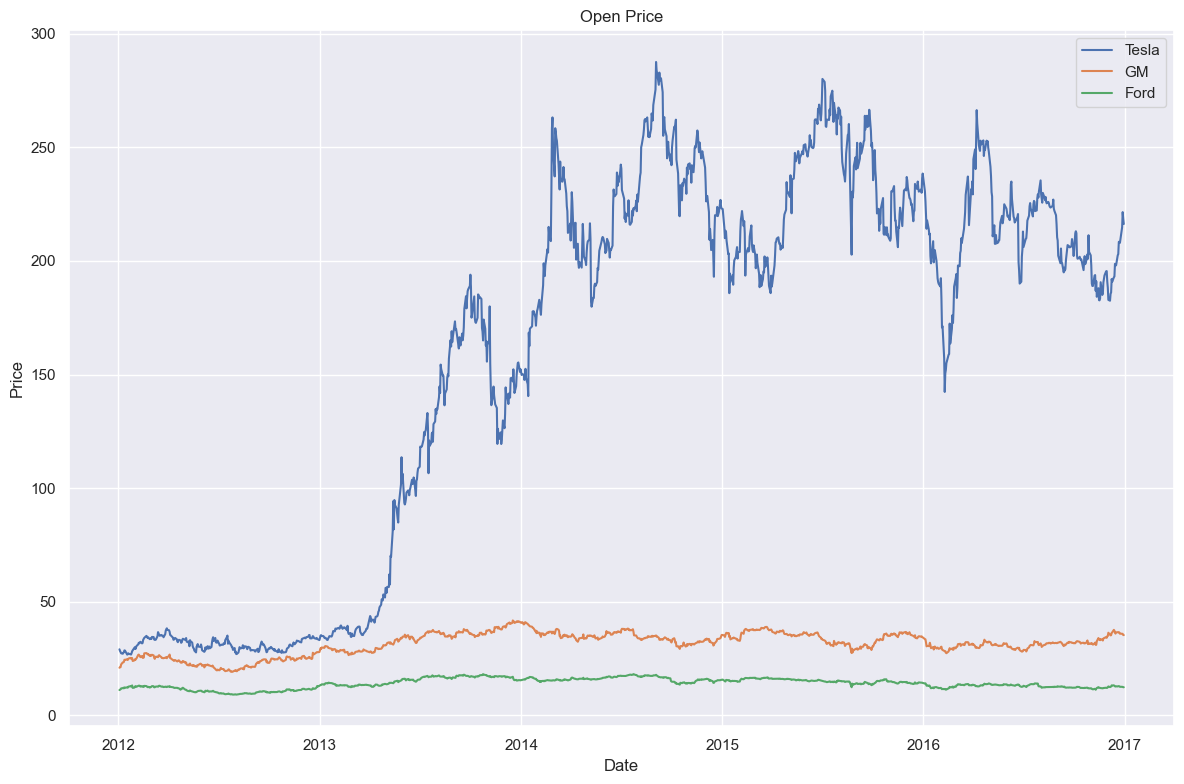

In [24]:
datalist = [(tesla, 'Tesla'),
            (gm, 'GM'),
            (ford, 'Ford')]

multi_dataset_lineplot(datalist, 'Date', 'Open', (12,8))
plt.title('Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

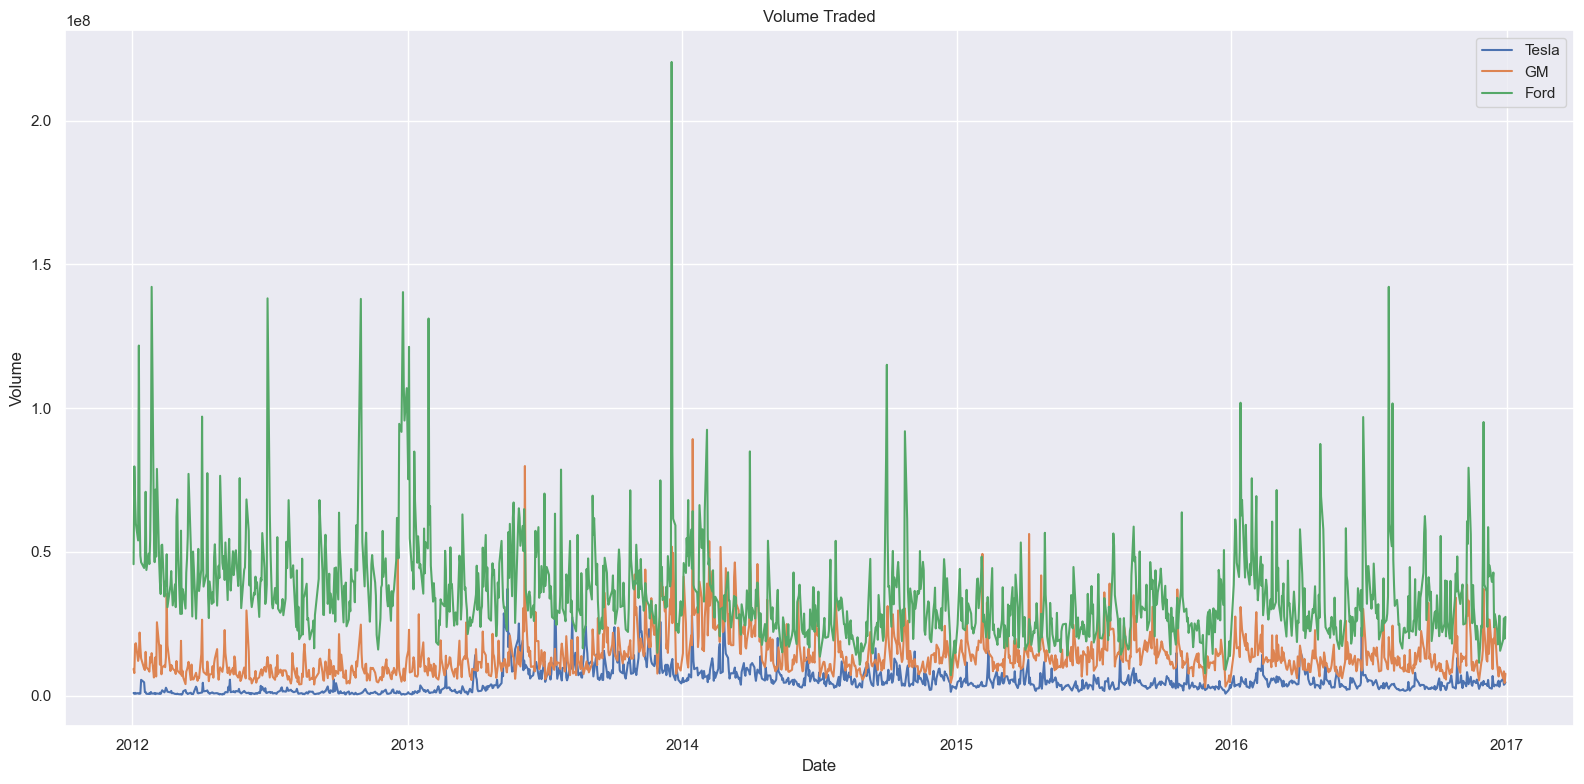

In [25]:
multi_dataset_lineplot(datalist, 'Date', 'Volume', (16,8))
plt.title('Volume Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
max_volume_date = ford.loc[ford['Volume'].idxmax(), 'Date']
max_volume = ford.loc[ford['Volume'].idxmax(), 'Volume']

In [27]:
print(f"The highest volume was on {max_volume_date}, with a volume of {max_volume}.")

The highest volume was on 2013-12-18 00:00:00, with a volume of 220362796.


```
Ford experienced a significant spike on 2023-12-18 due to concerns that the cost of launching new products would cut into next year's profits, leading to a major sell-off that day.
```

```
Based on the two charts above, Tesla look like its always been much more valuable as a company than GM and Ford, but this requires examining market cap, not just stock price. Since we lack data on total stock units, we approximate by multiplying the Volume column by the average price. This is not the actual market cap but a representation of total money traded over time
```

In [28]:
# calculates the average trading price
def cal_avg_trading_price(datasets, cal_col, new_col_name):
    for dataset in datasets:
        dataset[new_col_name] = dataset[cal_col].mean(axis = 1)

In [29]:
price_col = ['Open', 'Close', 'High', 'Low']
cal_avg_trading_price(datasets, price_col, 'avg trading price')

In [30]:
# calculates the total trade amount for each dataset
def cal_total_trade(datasets, price_col, volume_col, new_col_name):
    for dataset in datasets:
        dataset[new_col_name] = dataset[price_col] * dataset[volume_col]

In [31]:
cal_total_trade(datasets, 'avg trading price', 'Volume', 'total trade')

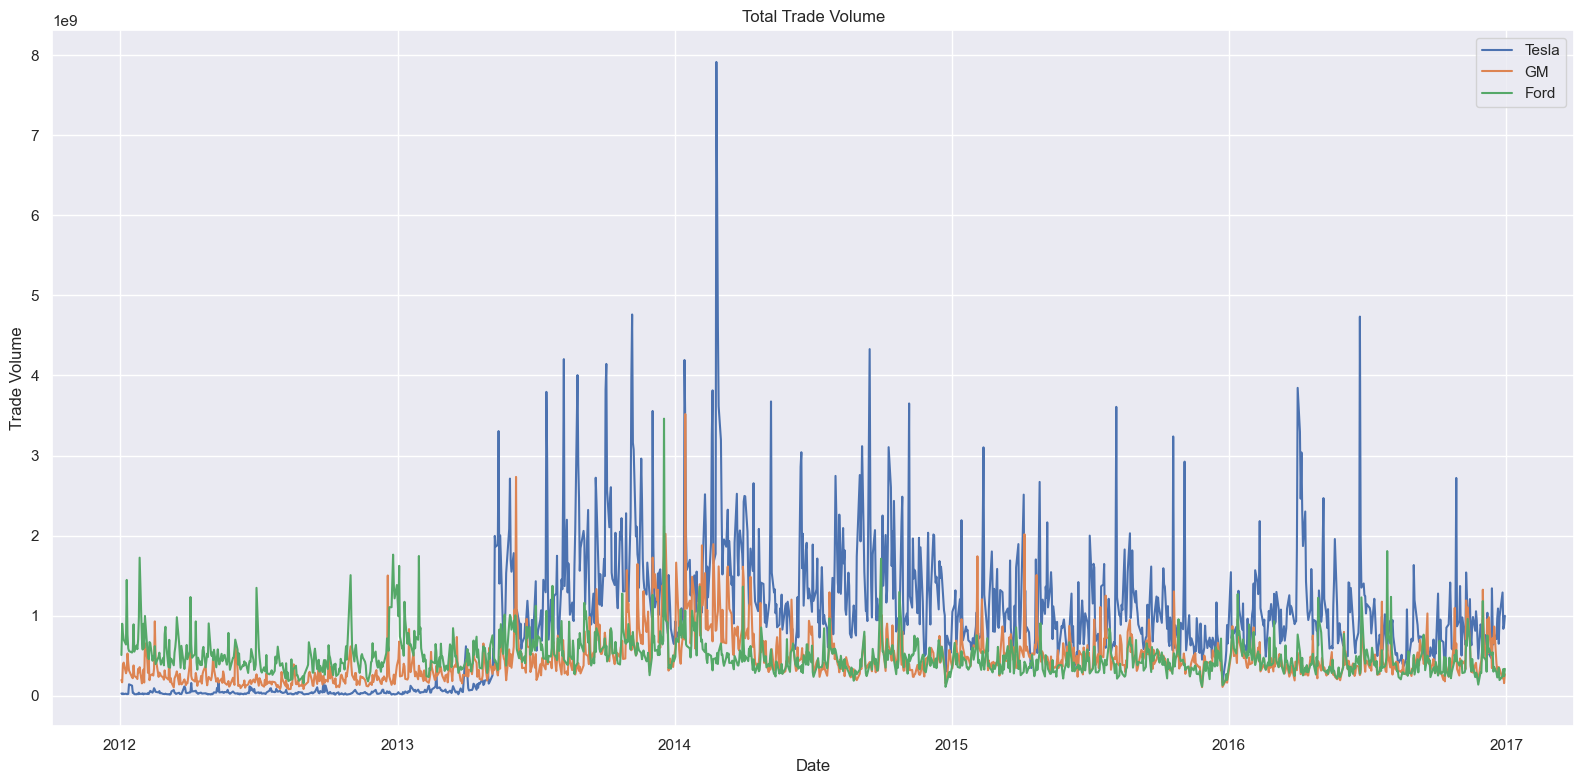

In [32]:
multi_dataset_lineplot(datalist, 'Date', 'total trade', (16,8))
plt.title('Total Trade Volume')
plt.xlabel('Date')
plt.ylabel('Trade Volume')
plt.legend()
plt.tight_layout()
plt.show()

```
There was huge amount of money traded for Tesla somewhere in early 2014
```

In [33]:
max_total_volume_date = tesla.loc[tesla['total trade'].idxmax(), 'Date']
max_total_volume = tesla.loc[tesla['total trade'].idxmax(), 'total trade']

In [34]:
print(f"The highest volume was on {max_total_volume_date}, with a volume of {max_total_volume}.")

The highest volume was on 2014-02-25 00:00:00, with a volume of 7917605762.500001.


```
A significant amount of money was traded for Tesla on 2014-02-25 due to a surge in Tesla's shares following a Morgan Stanley report.
```

In [35]:
# calculates moving averages for each dataset
def cal_moving_average(datasets, col, windows):
    for dataset in datasets:
        for window in windows:
            dataset[f"MA{window}"] = dataset[col].rolling(window = window).mean()

In [36]:
cal_moving_average(datasets, 'avg trading price', [50, 200])

In [37]:
# generates line plots for multiple columns from a single dataset
def mulit_col_lineplot(dataset, x_col, y_cols, figsize):
    plt.figure(figsize = figsize)
    for col, label in y_cols:
        sns.lineplot(data = dataset, x = x_col, y = col, label = label)

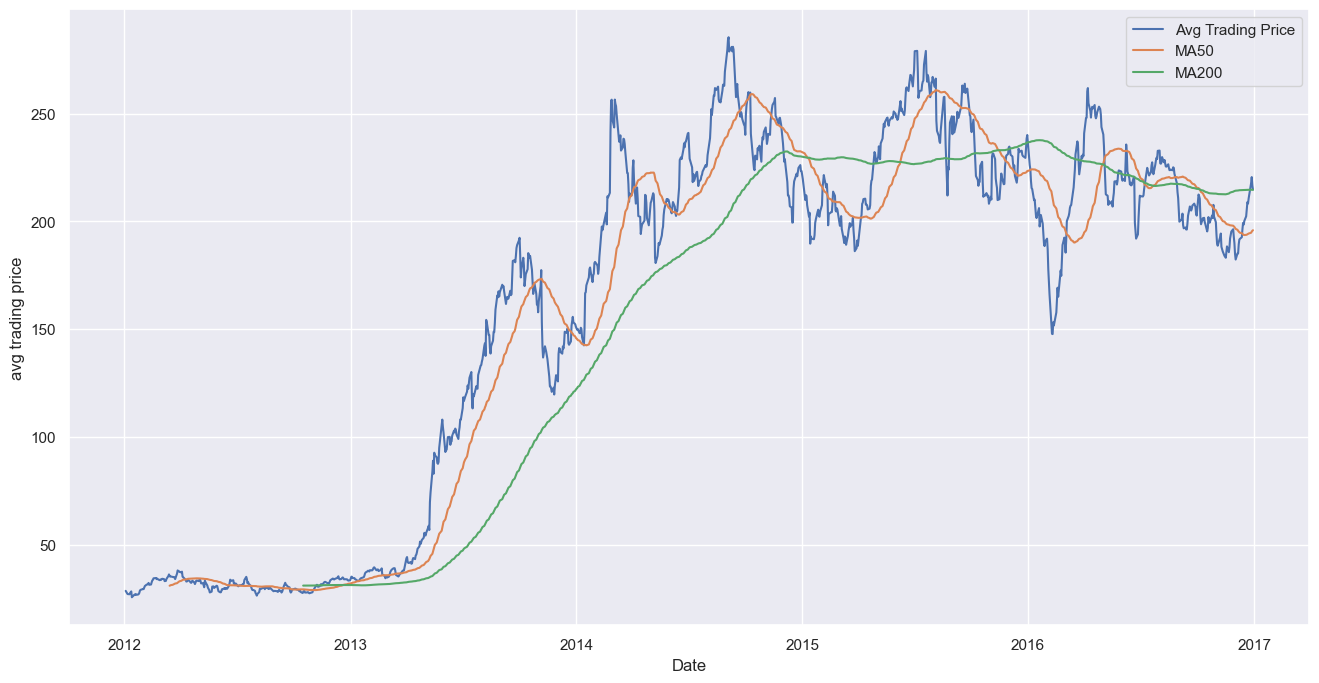

In [38]:
y_cols = [('avg trading price', 'Avg Trading Price'),
          ('MA50', 'MA50'),
          ('MA200', 'MA200')]

mulit_col_lineplot(tesla, 'Date', y_cols, (16,8))

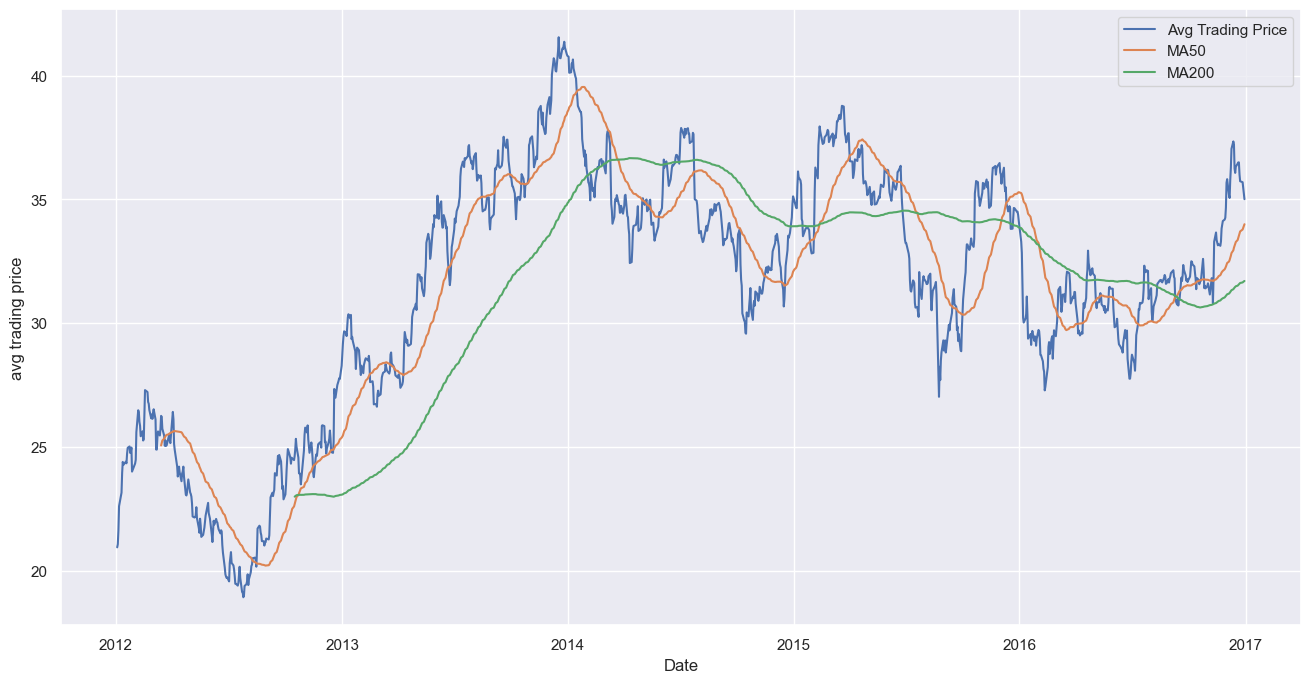

In [39]:
mulit_col_lineplot(gm, 'Date', y_cols, (16,8))

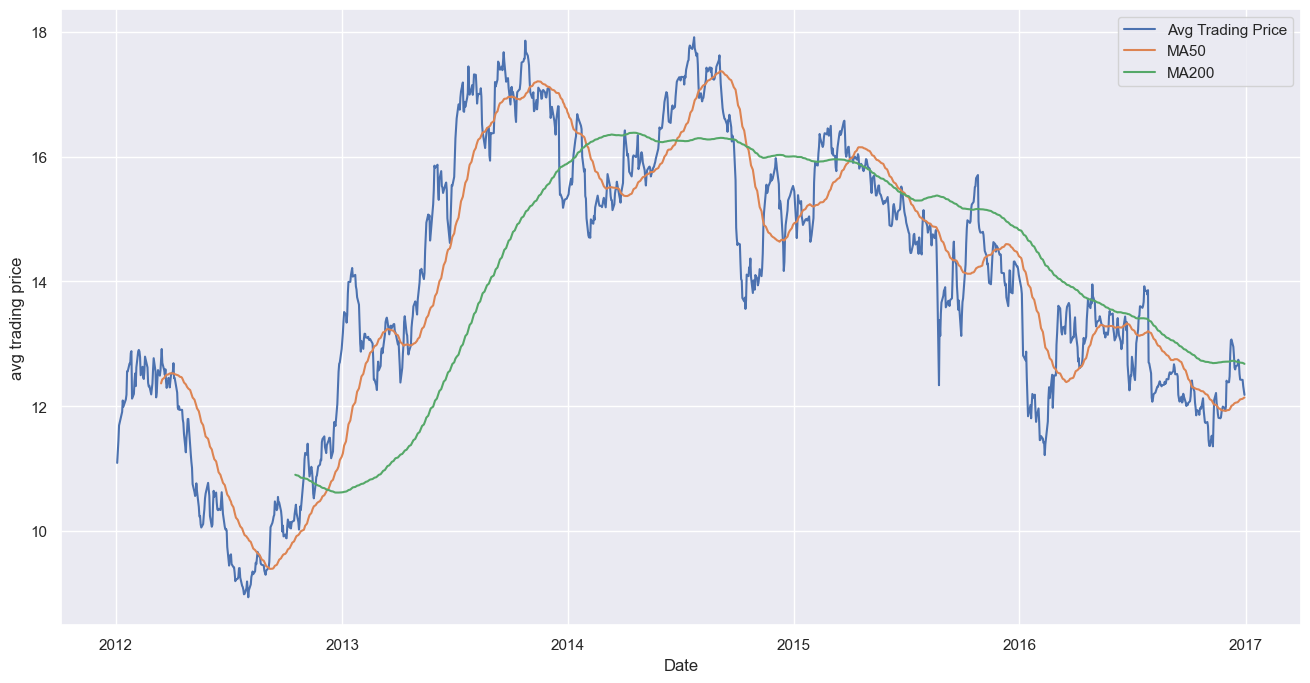

In [40]:
mulit_col_lineplot(ford, 'Date', y_cols, (16,8))

```
Tesla shows high volatility and growth potential, making it attractive for high-risk, high-reward investors.
GM and Ford are more stable, offering safer investment options for risk-averse investors.
```

```
Explore whether there is a relationship between these stocks, as they all belong to the car industry.

```

In [41]:
from pandas.plotting import scatter_matrix

In [42]:
car_industry = pd.concat([tesla['avg trading price'], 
                          gm['avg trading price'], 
                          ford['avg trading price']], axis = 1)

In [43]:
car_industry.columns = ['Tesla Open', 'GM Open', 'Ford Open']

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='GM Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='GM Open'>,
        <Axes: xlabel='GM Open', ylabel='GM Open'>,
        <Axes: xlabel='Ford Open', ylabel='GM Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='GM Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

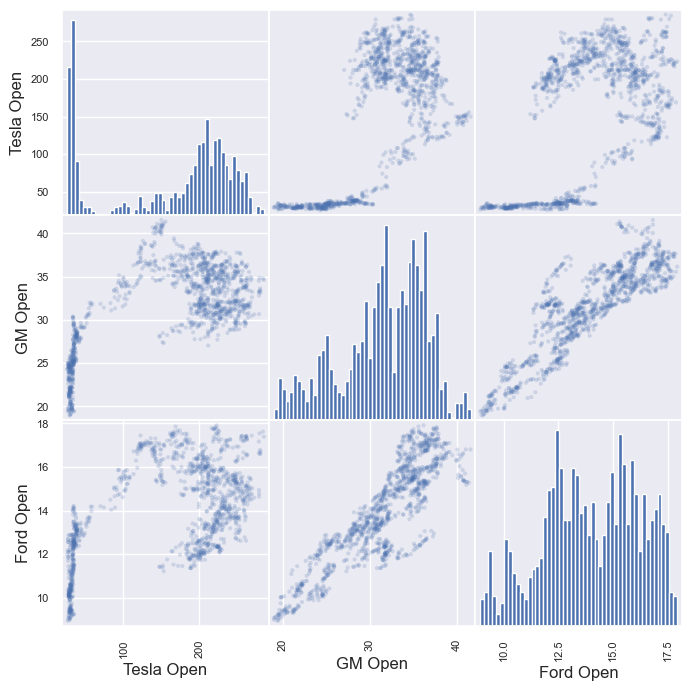

In [44]:
scatter_matrix(car_industry, figsize = (8,8), alpha = 0.2, hist_kwds={'bins': 50})

```
Tesla appears to be less influenced by industry-wide trends compared to GM and Ford.
GM and Ford share stronger price correlations, likely due to their similar market positioning and external influences in the automotive sector.
```

In [45]:
# calculates the daily return ratio for each dataset.
def cal_daily_return_rate(datasets, col, new_col_name, lag):
    for dataset in datasets:
        dataset[new_col_name] = (dataset[col]/dataset[col].shift(lag))-1

In [46]:
cal_daily_return_rate(datasets, 'Close', 'daily return ratio', 1)

In [47]:
# generates a histogram across multiple datasets
def multi_dataset_histplot(datasets, col, figsize, bin):
    plt.figure(figsize = figsize)
    for dataset, label in datasets:
        sns.histplot(dataset[col], bins = bin, kde = True, label=label)

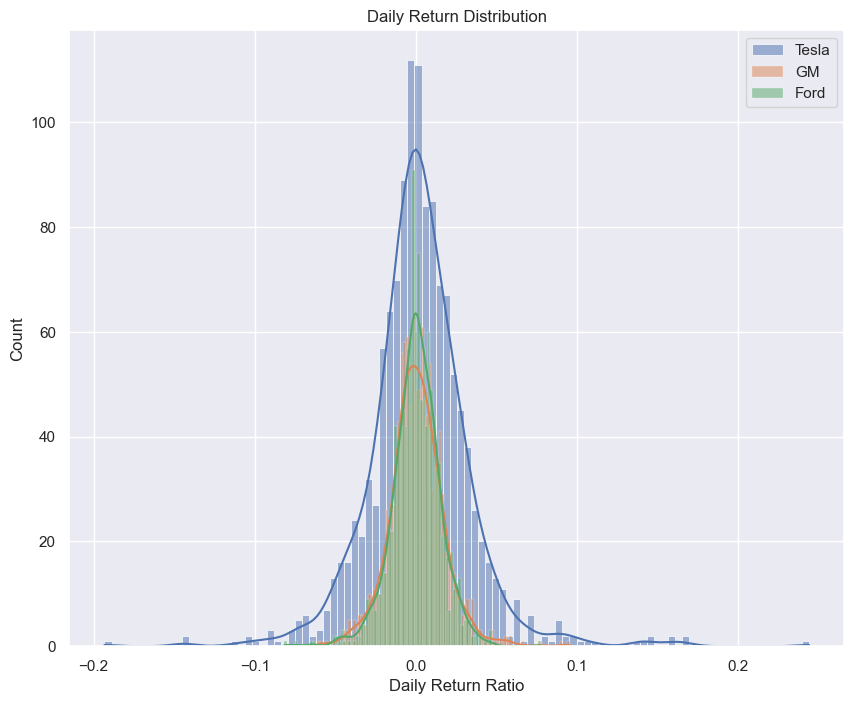

In [48]:
multi_dataset_histplot(datalist, 'daily return ratio', (10,8), 100)
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return Ratio')
plt.ylabel('Count')
plt.legend()
plt.show()

```
GM and Ford are relatively stable, while Tesla exhibits higher volatility due to its wider distribution. Ford is more stable than GM, as its distribution shows two sharp peaks close to zero. Among the three, Ford is the most stable, with the highest peak centered around zero.
```

In [49]:
boxplot_data = pd.concat([tesla['daily return ratio'], ford['daily return ratio'], gm['daily return ratio']], axis = 1)
boxplot_data.columns = ['Tesla Return', 'Ford Return', 'GM Return']

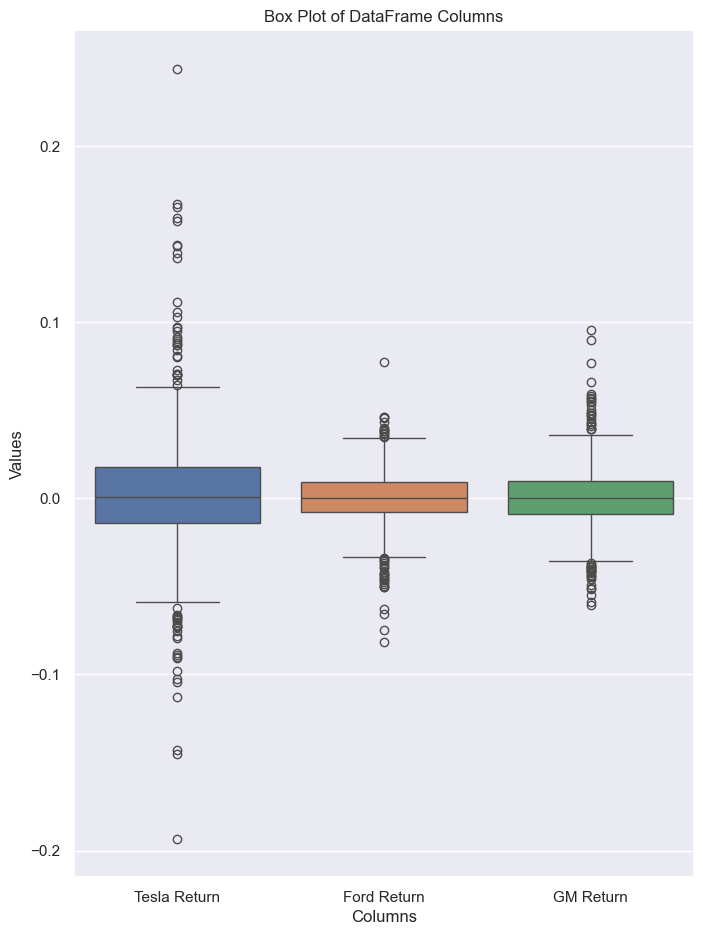

In [50]:
plt.figure(figsize=(8, 11))
sns.boxplot(data=boxplot_data)
plt.title('Box Plot of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

```
Ford is the most stable with the smallest IQR and few outliers, Tesla is the most volatile with the widest range and many outliers, while GM shows moderate volatility between the two.
```

array([[<Axes: xlabel='Tesla Return', ylabel='Tesla Return'>,
        <Axes: xlabel='Ford Return', ylabel='Tesla Return'>,
        <Axes: xlabel='GM Return', ylabel='Tesla Return'>],
       [<Axes: xlabel='Tesla Return', ylabel='Ford Return'>,
        <Axes: xlabel='Ford Return', ylabel='Ford Return'>,
        <Axes: xlabel='GM Return', ylabel='Ford Return'>],
       [<Axes: xlabel='Tesla Return', ylabel='GM Return'>,
        <Axes: xlabel='Ford Return', ylabel='GM Return'>,
        <Axes: xlabel='GM Return', ylabel='GM Return'>]], dtype=object)

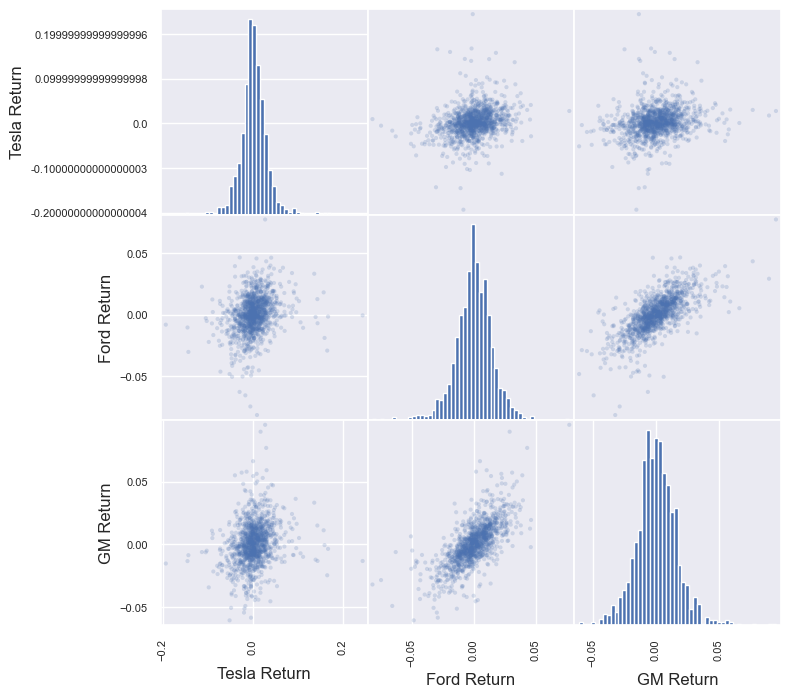

In [51]:
scatter_matrix(boxplot_data, figsize = (8,8), alpha = 0.2, hist_kwds={'bins': 50})

```
Ford and GM returns show a clear correlation, further confirms that GM and Ford exhibit a correlation in their stock prices. 
In contrast, Tesla demonstrates weaker correlations, emphasizing its unique market dynamics.
```

In [52]:
def cal_cumulative_return(datasets, col, new_col_name):
    for dataset in datasets:
        dataset[new_col_name] = (1 + dataset[col]).cumprod()

In [53]:
cal_cumulative_return(datasets, 'daily return ratio', 'cumulative return')

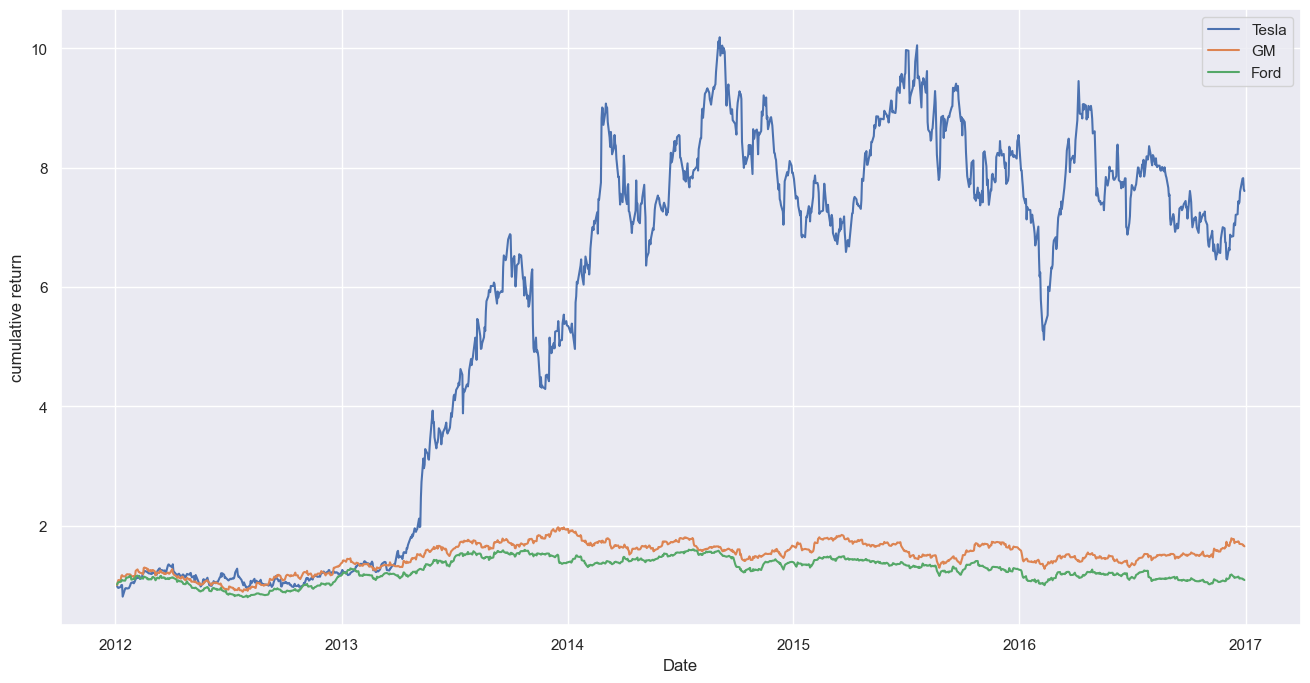

In [54]:
multi_dataset_lineplot(datalist, 'Date', 'cumulative return', (16,8))

```
Tesla significantly outperformed GM and Ford, offering the highest return on a $1 investment and highlighting its high-risk, high-reward profile.
In contrast, GM and Ford showed steady but low returns, with Ford having the lowest return, making it the least profitable option in this comparison.
```